In [1]:
# Interactive AoA Network in Jupyter
# Enable interactive matplotlib backend for Jupyter
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from datetime import date, timedelta
from collections import defaultdict
import json
from matplotlib.widgets import Button

# Import the project utilities
import sys
import os
# sys.path.insert(0, os.path.join(os.path.dirname(''), 'project_utils'))
from project_utils.project import Project

global project
print("Interactive matplotlib backend enabled for Jupyter")


Interactive matplotlib backend enabled for Jupyter


In [2]:
# Interactive Task Entry using qgridnext (modern qgrid replacement)
import qgridnext as qgrid
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
from datetime import date

# Create initial task data
task_data = {
    'Task Name': ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6', 'Task 7', 'Task 8', 'Task 9', 'Task 10', 
                  'Task 11', 'Task 12', 'Task 13', 'Task 14', 'Task 15', 'Task 16', 'Task 17', 'Task 18'],
    'Duration': [10, 20, 40, 30, 10, 0, 10, 30, 20, 25, 10, 10, 0, 10, 5, 5, 5, 5],
    'Predecessors': ['', '1', '1', '1', '2', '3', '3', '5', '6,8', '6,8', '4,7,9', '10', '11,12', '11,12', '11,12', '13', '14,16', '15,17']
}

# Create DataFrame
task_df = pd.DataFrame(task_data)

# Create qgrid widget for interactive editing
qgrid_widget = qgrid.show_grid(
    task_df, 
    show_toolbar=True,
    grid_options={
        'syncColumnCellResize': True,
        'forceFitColumns': False,
        'defaultColumnWidth': 150,
        'enableColumnReorder': False,
        'enableTextSelectionOnCells': True,
        'rowHeight': 28,
        'enableCellNavigation': True,
        'fullWidthRows': True
    },
    column_options={
        'editable': True
    },
    column_definitions={
        'Task Name': {'width': 200, 'editable': True},
        'Duration': {'width': 100, 'editable': True},
        'Predecessors': {'width': 150, 'editable': True}
    }
)

# Output area for messages and results
output_area = widgets.Output()

# Function to create project from qgrid data
def create_project_from_qgrid():
    """Create a project from the qgrid data and return it."""
    # Get the current data from qgrid
    current_data = qgrid_widget.get_changed_df()
    
    # Create new project
    project = Project("iDesign Lab Example Project", date(2020, 1, 6))
    
    # Add tasks from the grid data
    for idx, row in current_data.iterrows():
        task_name = row['Task Name']
        duration = int(row['Duration'])
        predecessors_str = str(row['Predecessors']).strip()
        
        if predecessors_str and predecessors_str != 'nan':
            # Parse predecessors (comma-separated string)
            pred_list = [int(p.strip()) for p in predecessors_str.split(',') if p.strip().isdigit()]
            project.add_task(task_name, duration, predecessors=pred_list)
        else:
            project.add_task(task_name, duration)
    
    return project

# Function to add a new row to the qgrid
def add_new_task():
    """Add a new task row to the qgrid."""
    with output_area:
        output_area.clear_output()
        try:
            current_data = qgrid_widget.get_changed_df()
            next_task_num = len(current_data) + 1
            
            # Create new row
            new_row = pd.DataFrame({
                'Task Name': [f'Task {next_task_num}'],
                'Duration': [0],
                'Predecessors': ['']
            })
            
            # Add to existing data
            updated_data = pd.concat([current_data, new_row], ignore_index=True)
            
            # Update the qgrid with new data
            qgrid_widget.df = updated_data
            
            print(f"➕ Added Task {next_task_num}")
        except Exception as e:
            print(f"❌ Error adding task: {e}")

# Function to remove the last row from qgrid
def remove_last_task():
    """Remove the last task row from the qgrid."""
    with output_area:
        output_area.clear_output()
        try:
            current_data = qgrid_widget.get_changed_df()
            if len(current_data) <= 1:
                print("❌ Cannot remove the last task. At least one task is required.")
                return
            
            # Remove last row
            updated_data = current_data.iloc[:-1].copy()
            
            # Update the qgrid
            qgrid_widget.df = updated_data
            
            print(f"🗑️ Removed last task")
        except Exception as e:
            print(f"❌ Error removing task: {e}")

# Function to reset to original data
def reset_to_default():
    """Reset qgrid to original task data."""
    with output_area:
        output_area.clear_output()
        qgrid_widget.df = pd.DataFrame(task_data)
        print("🔄 Reset to default values")

# Function to preview current data
def preview_data():
    """Preview current qgrid data."""
    with output_area:
        output_area.clear_output()
        current_data = qgrid_widget.get_changed_df()
        print("📋 Current Task Data:")
        display(current_data)

# Event handler for apply changes
def on_apply_changes(b):
    with output_area:
        output_area.clear_output()
        try:
            global project
            project = create_project_from_qgrid()
            print(f"✅ Project updated: {project.name}")
            print(f"📊 Tasks: {len(project.tasks)}")
            
            # Display updated task schedule
            task_schedule = project.schedule_tasks()
            display(task_schedule)
        except Exception as e:
            print(f"❌ Error: {e}")

# Create buttons
add_task_button = widgets.Button(description="➕ Add New Task", button_style='primary')
remove_task_button = widgets.Button(description="🗑️ Remove Last Task", button_style='warning')
apply_button = widgets.Button(description="Apply Changes & Create Project", button_style='success')
reset_button = widgets.Button(description="Reset to Default", button_style='warning')
preview_button = widgets.Button(description="Preview Data", button_style='info')

# Connect event handlers
add_task_button.on_click(lambda b: add_new_task())
remove_task_button.on_click(lambda b: remove_last_task())
apply_button.on_click(on_apply_changes)
reset_button.on_click(lambda b: reset_to_default())
preview_button.on_click(lambda b: preview_data())

# Organize buttons
task_management_buttons = widgets.HBox([add_task_button, remove_task_button])
main_buttons = widgets.HBox([apply_button, reset_button, preview_button])

# Add a title
title = widgets.HTML(value="<h3>Interactive Task Editor (QGrid)</h3><p>Edit tasks in the grid below. Double-click cells to edit them.</p>")

on_apply_changes(apply_button)

# Display the interface
display(title)
display(qgrid_widget)
display(task_management_buttons)
display(main_buttons)
display(output_area)

print("🎯 QGrid task editor ready!")
print("📝 Features:")
print("  • Edit tasks by double-clicking cells in the grid")
print("  • Add new tasks with the '➕ Add New Task' button")
print("  • Remove the last task with the '🗑️ Remove Last Task' button")
print("  • Use toolbar buttons for sorting, filtering, and more")
print("  • Preview changes before applying")
print("  • Reset to original values anytime")
print("  • Click 'Apply Changes & Create Project' when ready!")


HTML(value='<h3>Interactive Task Editor (QGrid)</h3><p>Edit tasks in the grid below. Double-click cells to edi…

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Output()

🎯 QGrid task editor ready!
📝 Features:
  • Edit tasks by double-clicking cells in the grid
  • Add new tasks with the '➕ Add New Task' button
  • Remove the last task with the '🗑️ Remove Last Task' button
  • Use toolbar buttons for sorting, filtering, and more
  • Preview changes before applying
  • Reset to original values anytime
  • Click 'Apply Changes & Create Project' when ready!


In [3]:
# The following code is a backup approach should the interactive approach above not work.

# # Create and set up the project
# project = Project("iDesign Lab Example Project", date(2020, 1, 6))

# # Add tasks
# project.add_task("Task 1", 10)
# project.add_task("Task 2", 20, predecessors=[1])
# project.add_task("Task 3", 40, predecessors=[1])
# project.add_task("Task 4", 30, predecessors=[1])
# project.add_task("Task 5", 10, predecessors=[2])
# project.add_task("Task 6", 0, predecessors=[3])
# project.add_task("Task 7", 10, predecessors=[3])
# project.add_task("Task 8", 30, predecessors=[5])
# project.add_task("Task 9", 20, predecessors=[6, 8])
# project.add_task("Task 10", 25, predecessors=[6, 8])
# project.add_task("Task 11", 10, predecessors=[4, 7, 9])
# project.add_task("Task 12", 10, predecessors=[10])
# project.add_task("Task 13", 0, predecessors=[11, 12])
# project.add_task("Task 14", 10, predecessors=[11, 12])
# project.add_task("Task 15", 5, predecessors=[11, 12])
# project.add_task("Task 16", 5, predecessors=[13])
# project.add_task("Task 17", 5, predecessors=[14, 16])
# project.add_task("Task 18", 5, predecessors=[15, 17])

print(f"Project: {project.name}")
print(f"Start date: {project.start_date.strftime('%A, %B %d, %Y')}")
print(f"Tasks: {len(project.tasks)}")
task_df = project.schedule_tasks()
task_df


Project: iDesign Lab Example Project
Start date: Monday, January 06, 2020
Tasks: 21


,ID,Name,Duration,Start,Finish,EST,EFT,LST,LFT,TF,FF,IF,EFTe,Latest Start,Latest Finish,LFTe,Predecessors
0,1,Requirements,15,2020-01-06,2020-01-26,0,15,0,15,0,0,0,15,2020-01-06,2020-01-26,15,[]
1,2,Architecture,20,2020-01-27,2020-02-23,15,35,15,35,0,0,0,35,2020-01-27,2020-02-23,35,[1]
2,3,Project Planning,20,2020-02-24,2020-03-22,35,55,35,55,0,0,0,55,2020-02-24,2020-03-22,55,[2]
3,4,Test Plan,30,2020-03-23,2020-05-03,55,85,100,130,45,0,45,85,2020-05-25,2020-07-05,130,[3]
4,5,Test Harness,35,2020-05-04,2020-06-21,85,120,130,165,45,45,0,120,2020-07-06,2020-08-23,165,[4]
5,6,Logging,15,2020-03-23,2020-04-12,55,70,55,70,0,0,0,70,2020-03-23,2020-04-12,70,[3]
6,7,Security,20,2020-03-23,2020-04-19,55,75,90,110,35,35,0,75,2020-05-11,2020-06-07,110,[3]
7,8,Pub/Sub,5,2020-03-23,2020-03-29,55,60,105,110,50,50,0,60,2020-06-01,2020-06-07,110,[3]
8,9,Resource A,20,2020-03-23,2020-04-19,55,75,80,100,25,0,25,75,2020-04-27,2020-05-24,100,[3]
9,10,Resource B,15,2020-03-23,2020-04-12,55,70,65,80,10,0,10,70,2020-04-06,2020-04-26,80,[3]


Direct Golenko-Ginzburg Algorithm (Working with Raw Dependencies)
Step 1: Determining task processing order...
Processing order: [1, 2, 3, 4, 6, 7, 8, 9, 10, 5, 13, 16, 11, 12, 14, 15, 17, 18, 20, 19, 21]

Project start event: E0

Step 2: Assigning events using Golenko-Ginzburg rules...

Processing Task 1 (Requirements):
  Predecessors: []
  Start event: E0 (project start)
  End event: E1
  Successors: [2]

Processing Task 2 (Architecture):
  Predecessors: [1]
  Start event: E1
  End event: E2
  Successors: [3]

Processing Task 3 (Project Planning):
  Predecessors: [2]
  Start event: E2
  End event: E3
  Successors: [4, 6, 7, 8, 9, 10]

Processing Task 4 (Test Plan):
  Predecessors: [3]
  Start event: E3
  End event: E4
  Successors: [5]

Processing Task 6 (Logging):
  Predecessors: [3]
  Start event: E3
  End event: E5
  Successors: [11, 12, 13, 16]

Processing Task 7 (Security):
  Predecessors: [3]
  Start event: E3
  End event: E6
  Successors: [17, 18]

Processing Task 8 (Pub/Sub):

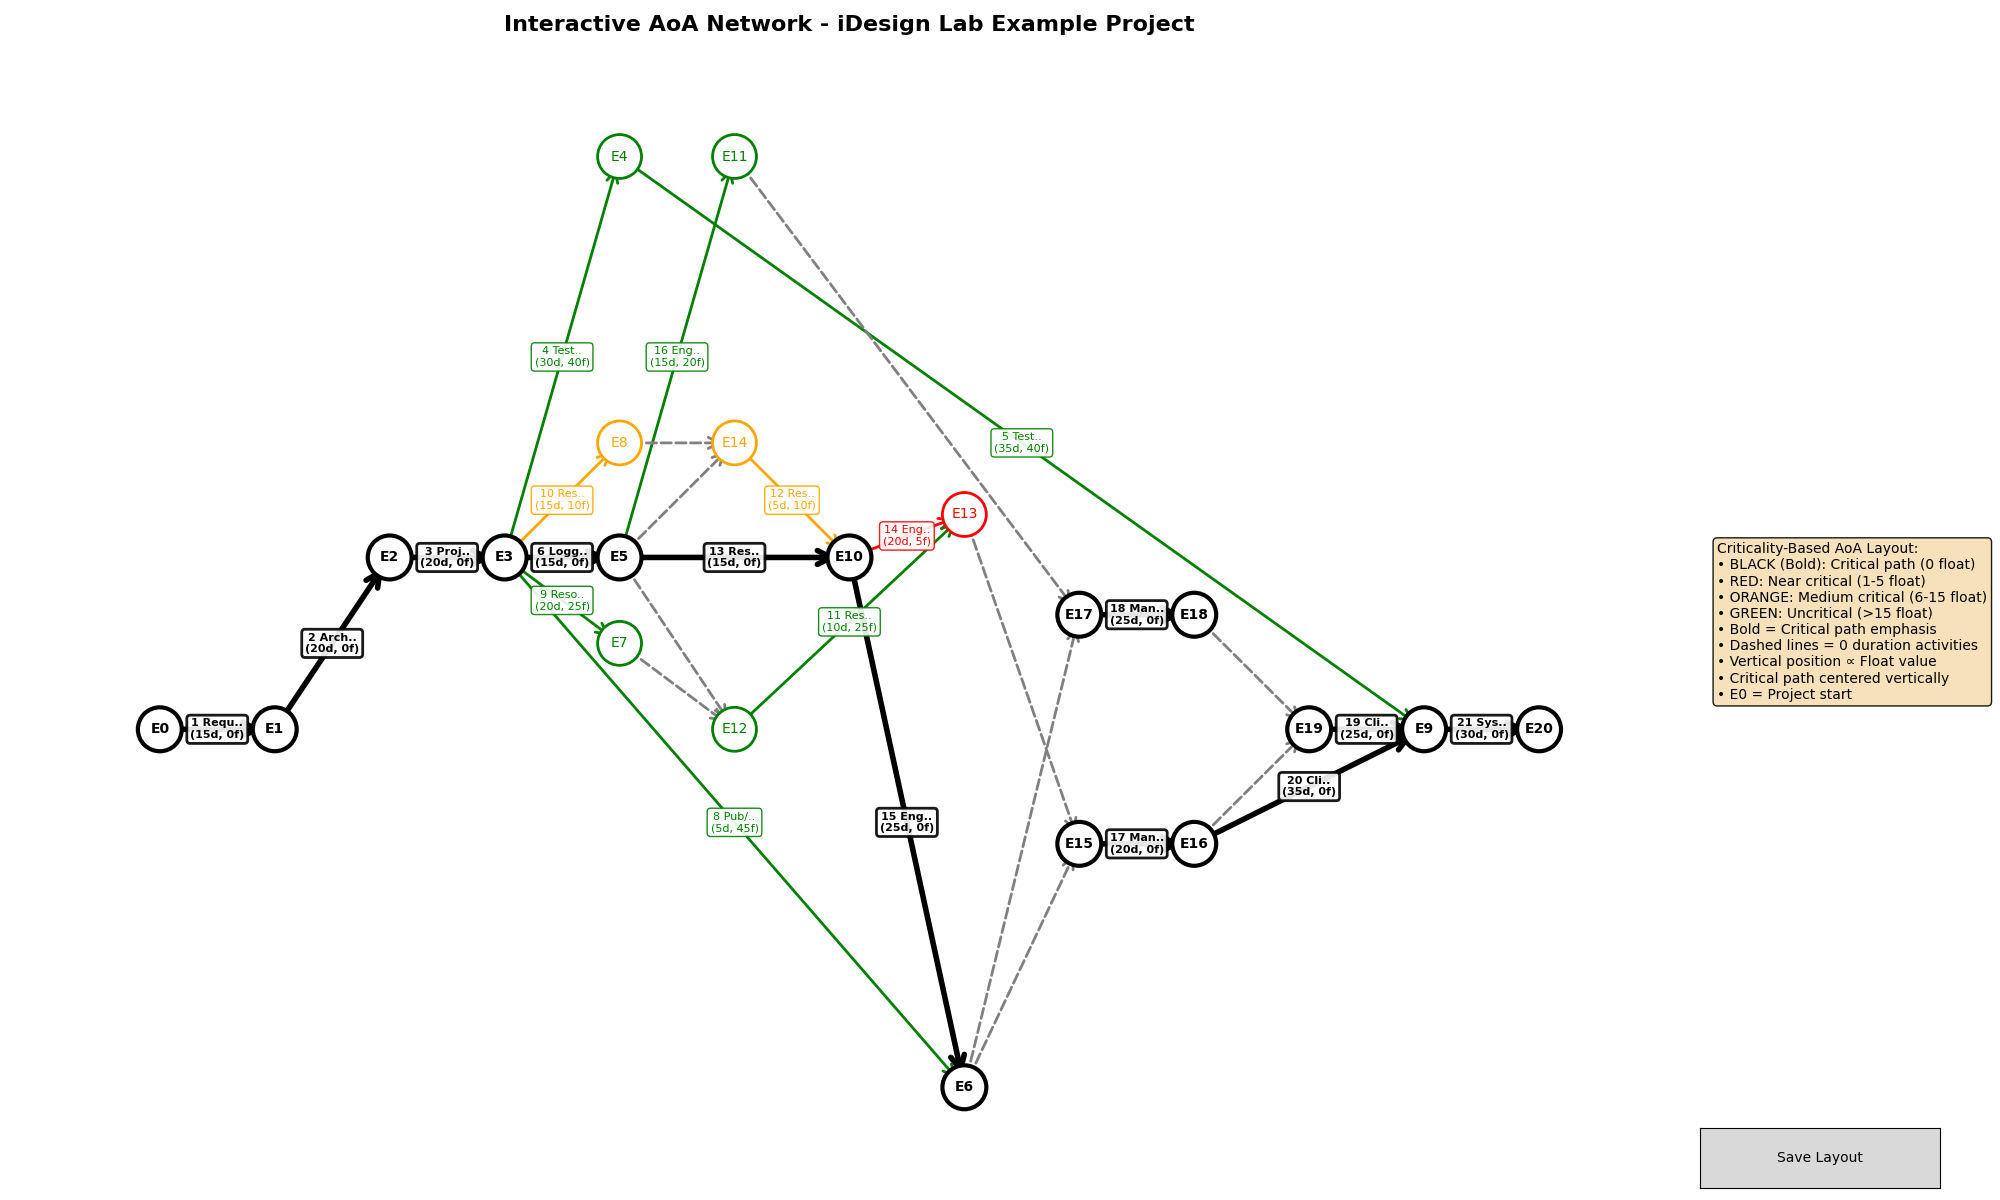

In [ ]:
# Generate the AoA network with interactive capability
def setup_interactive_aoa_plot():
    """Set up interactive AoA plotting in Jupyter."""
    
    # Generate the plot (this populates the aoa_*_artists attributes)
    g = project.draw_aoa_network_float_based(title=f"Interactive AoA Network - {project.name}")
    
    # Get current figure and axis
    fig = plt.gcf()
    ax = plt.gca()
    
    # Set up node tracking for interactivity
    node_order = getattr(project, 'aoa_node_order', list(g.nodes()))
    node_collection = None
    node_positions = {}
    node_indices = {}
    node_labels = {}  # Store references to node label text artists

    # Build correct mapping from nodes to their positions and indices
    for idx, node in enumerate(node_order):
        if node in project.aoa_node_artists:
            artist, pos = project.aoa_node_artists[node]
            node_collection = artist  # All nodes share the same PathCollection
            node_positions[node] = pos
            node_indices[node] = idx

    # Find and store node label text artists
    for text_artist in ax.texts:
        # Node labels have format like "E0" or similar
        if hasattr(text_artist, 'get_text'):
            text_content = text_artist.get_text()
            if text_content.startswith('E'):
                try:
                    node_num = int(text_content[1:])  # Remove 'E' and get number
                    if node_num in node_positions:
                        node_labels[node_num] = text_artist
                except (ValueError, IndexError):
                    pass

    edge_artists = getattr(project, 'aoa_edge_artists', {})
    label_artists = getattr(project, 'aoa_label_artists', {})

    dragging = {'node': None, 'offset': (0, 0)}

    def hit_test(event):
        if event.inaxes != ax or event.xdata is None or event.ydata is None:
            return None
        
        tol = 0.8  # Tolerance for clicking
        closest_node = None
        closest_distance = float('inf')
        
        # Find the closest node within tolerance
        for node, (x, y) in node_positions.items():
            distance = np.hypot(event.xdata - x, event.ydata - y)
            if distance < tol and distance < closest_distance:
                closest_distance = distance
                closest_node = node
        
        return closest_node

    def on_press(event):
        node = hit_test(event)
        if node is not None:
            dragging['node'] = node
            x, y = node_positions[node]
            dragging['offset'] = (event.xdata - x, event.ydata - y)
            print(f"Grabbed node E{node} at position ({x:.2f}, {y:.2f})")

    def on_motion(event):
        node = dragging['node']
        if node is not None and event.inaxes == ax and event.xdata is not None and event.ydata is not None:
            new_x = event.xdata - dragging['offset'][0]
            new_y = event.ydata - dragging['offset'][1]
            node_positions[node] = (new_x, new_y)
            
            # Update PathCollection offsets
            if node in node_indices and node_collection is not None:
                idx = node_indices[node]
                offsets = node_collection.get_offsets()
                offsets[idx] = [new_x, new_y]
                node_collection.set_offsets(offsets)
            
            # Update node label position
            if node in node_labels:
                node_labels[node].set_position((new_x, new_y))
            
            # Update connected edges and labels
            for (u, v), edge_artist in edge_artists.items():
                if u == node or v == node:
                    x1, y1 = node_positions[u]
                    x2, y2 = node_positions[v]
                    # Handle FancyArrowPatch objects
                    if hasattr(edge_artist, 'set_positions'):
                        edge_artist.set_positions((x1, y1), (x2, y2))
                    elif hasattr(edge_artist, 'set_data'):
                        edge_artist.set_data([x1, x2], [y1, y2])
                    else:
                        # For FancyArrowPatch, update the path
                        edge_artist.set_position_a((x1, y1))
                        edge_artist.set_position_b((x2, y2))
            
            for (u, v), label_artist in label_artists.items():
                if u == node or v == node:
                    x1, y1 = node_positions[u]
                    x2, y2 = node_positions[v]
                    label_x = (x1 + x2) / 2
                    label_y = (y1 + y2) / 2
                    label_artist.set_position((label_x, label_y))
            
            fig.canvas.draw_idle()

    def on_release(event):
        node = dragging['node']
        if node is not None:
            print(f"Released node E{node}")
            dragging['node'] = None

    def save_layout(event=None):
        """Save current node positions to JSON file."""
        layout = {int(node): {'x': float(pos[0]), 'y': float(pos[1])} 
                 for node, pos in node_positions.items()}
        with open('aoa_layout.json', 'w') as f:
            json.dump(layout, f, indent=2)
        print("Layout saved to aoa_layout.json")

    def on_key(event):
        """Handle keyboard shortcuts."""
        if event.key == 's':
            save_layout()

    # Connect event handlers
    fig.canvas.mpl_connect('button_press_event', on_press)
    fig.canvas.mpl_connect('motion_notify_event', on_motion)
    fig.canvas.mpl_connect('button_release_event', on_release)
    fig.canvas.mpl_connect('key_press_event', on_key)

    # Add save button
    button_ax = fig.add_axes([0.85, 0.01, 0.12, 0.05])
    save_button = Button(button_ax, 'Save Layout')
    save_button.on_clicked(save_layout)

    print('Interactive AoA editing enabled in Jupyter!')
    print('- Drag nodes to move them')
    print('- Press "s" to save layout')
    print('- Click "Save Layout" button to save')
    
    return fig, ax

# Call the setup function
fig, ax = setup_interactive_aoa_plot()
